<a href="https://colab.research.google.com/github/anurag2506/Image-Compression-using-PCA/blob/main/PCA_compression_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sklearn

In [7]:
img = cv2.imread('/content/Untitled Folder/Basketball.png')
img = cv2.cvtColor(cv2.imread('/content/Untitled Folder/Basketball.png'), cv2.COLOR_BGR2RGB)

In [8]:
img.shape

(340, 340, 3)

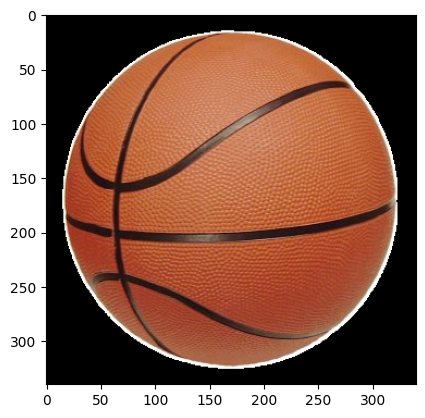

In [10]:
plt.imshow(img)

We have to split the image into 3 channels. We will apply PCA on each channel by trying to compress the 2 dimensional image


In [14]:
r,g,b=cv2.split(img)

normalising the image so that the values of r,g and b stay in between 1 and 0

In [15]:
r,g,b=r/255,g/255,b/255

Now we will look into each channel to try to compress it

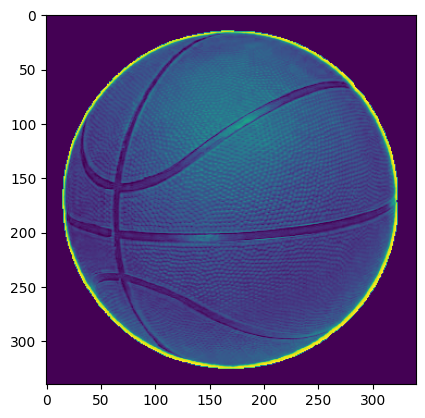

In [24]:
plt.imshow(b)

In [27]:
!pip install sklearn
from sklearn.decomposition import PCA

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Now we perform dimensionality reduction on a data matrix, the red channel and proceed to this with the green and blue channels as well

Then the number of pca_components is used to specify the number of components to retain after reduction using PCA

The fit(r) analyzes the data and identifies the directions of greatest variance. These directions are called pincipal **components**

The pca_components decide the clarity of the image

In [53]:
pca_components=100

pca_r=PCA(n_components=pca_components)
reduced_r=pca_r.fit_transform(r)

pca_g=PCA(n_components=pca_components)
reduced_g=pca_g.fit_transform(g)

pca_b=PCA(n_components=pca_components)
reduced_b=pca_b.fit_transform(b)

In [54]:
reduced_r.shape, reduced_g.shape, reduced_b.shape

((340, 100), (340, 100), (340, 100))

In [55]:
combined=np.array([reduced_r,reduced_g,reduced_b])

In [56]:
reconstructed_r=pca_r.inverse_transform(reduced_r)
reconstructed_g=pca_g.inverse_transform(reduced_g)
reconstructed_b=pca_b.inverse_transform(reduced_b)

In [57]:
reconstructed_r.shape
reconstructed_g.shape
reconstructed_b.shape

(340, 340)

In [58]:
img_reconstructed=(cv2.merge([reconstructed_r, reconstructed_g, reconstructed_b]))

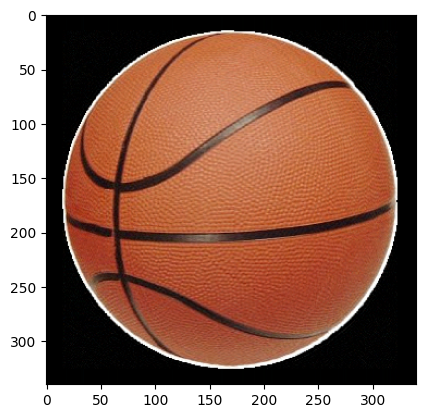

In [59]:
plt.imshow(img_reconstructed)

talk about the compressibility of different image fomrats